- Liam Tessendorf - 20-701-348
- Maximilian von Willich - 17-944-349

For the provided datasets (you can find the dataset files in the Assignment folder on Teams):

1. (1 points) Compute degree, closeness, betweenness and eigenvector centrality for each node. Plot the distribution for each of the centralities, paying attention to binning.

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import os

In [2]:
gml_files = [f for f in os.listdir("data/") if f.endswith(".gml")]

graphs = [nx.read_gml(os.path.join("data/", path)) for path in gml_files]

In [3]:
def plot_centrality_distribution(graphs, centralities_per_g: list, c_type: str):
    for i, g in enumerate(graphs):
        centralities = centralities_per_g[i].values()
        # centralities = [c for c in centralities if c > 0]
        centralities = [c if c > 0 else 1e-10 for c in centralities]

        min_centrality = min(centralities)
        max_centrality = max(centralities)

        bins = np.logspace(np.log10(min_centrality), np.log10(max_centrality), num=20)

        plt.figure(figsize=(8, 6))
        plt.hist(centralities, bins=bins, density=True, edgecolor="black", alpha=0.7)

        plt.xscale("log")
        plt.yscale("log")

        plt.xlabel("Centrality (c)")
        plt.ylabel("Probability Density p(c)")
        plt.title(f"Probability Density of {c_type} Centrality Values ({gml_files[i]})")
        plt.show()

In [4]:
degree_c = [nx.degree_centrality(g) for g in graphs]
closeness_c = [nx.closeness_centrality(g) for g in graphs]
betweenness_c = [nx.betweenness_centrality(g) for g in graphs]
eigenvector_c = [nx.eigenvector_centrality(g) for g in graphs]

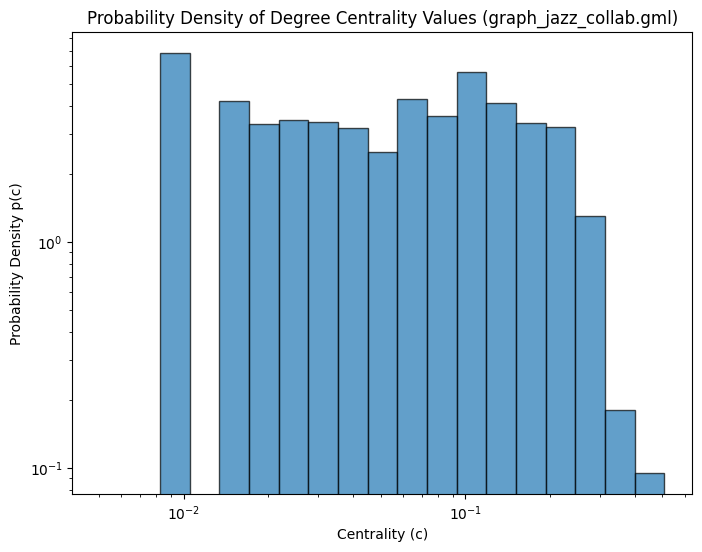

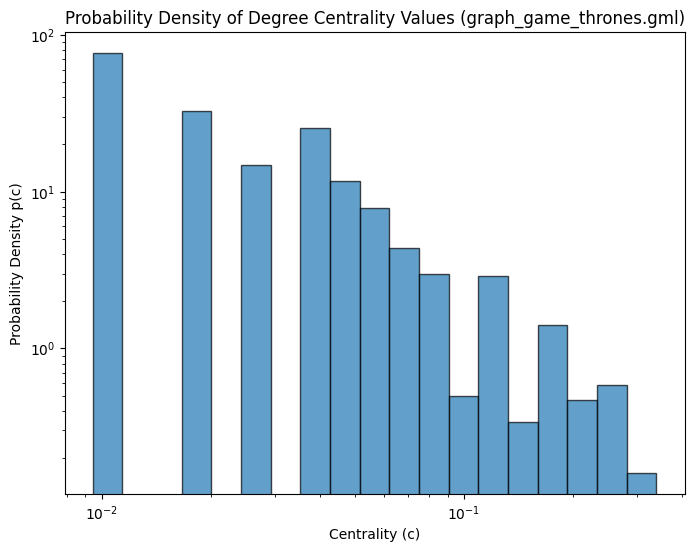

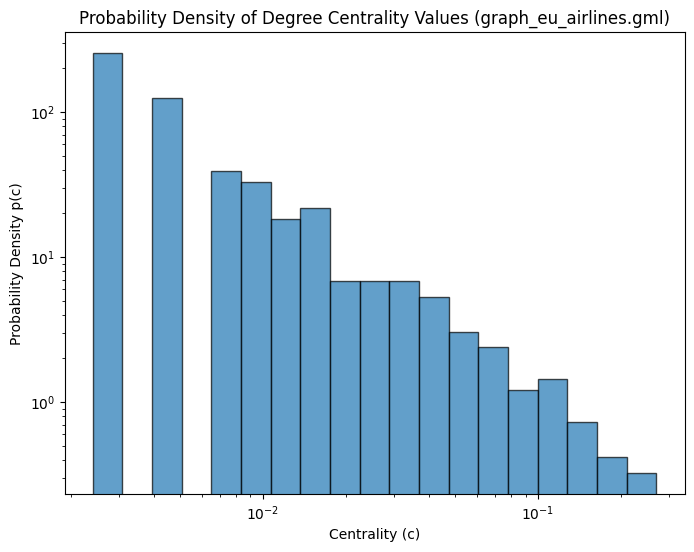

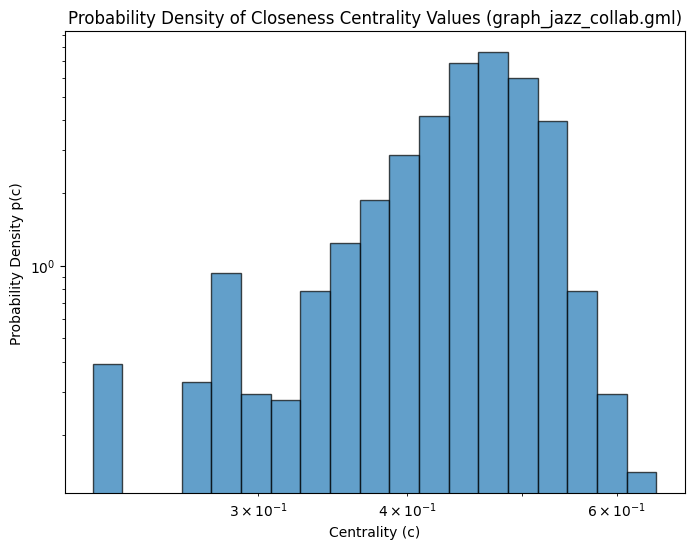

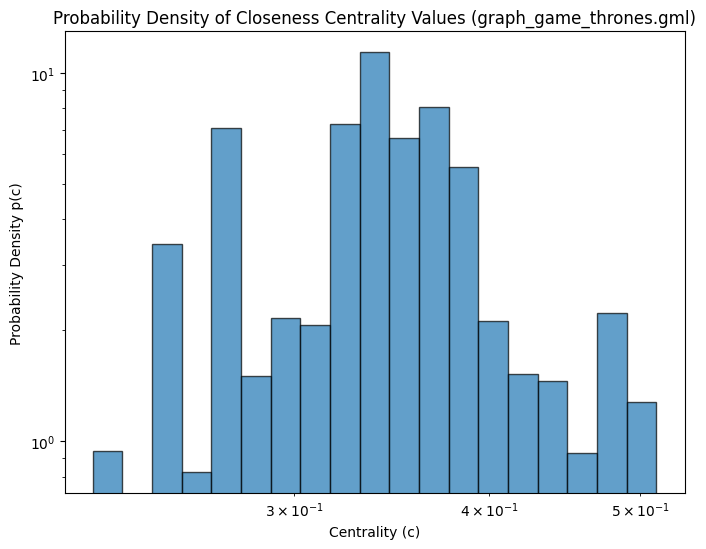

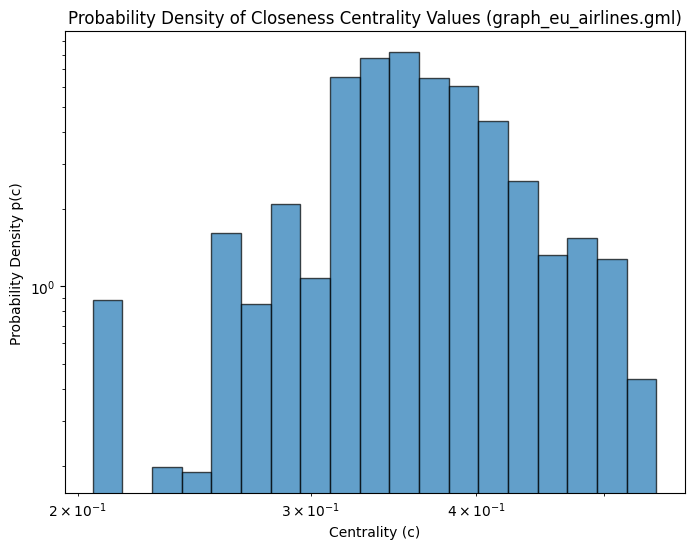

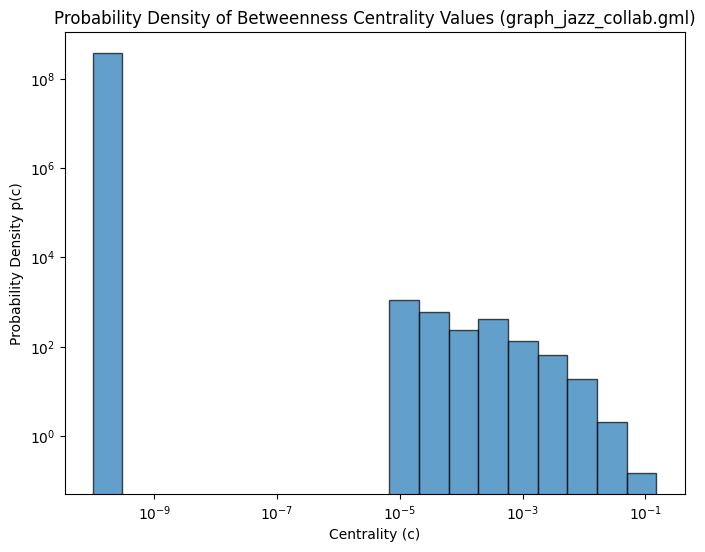

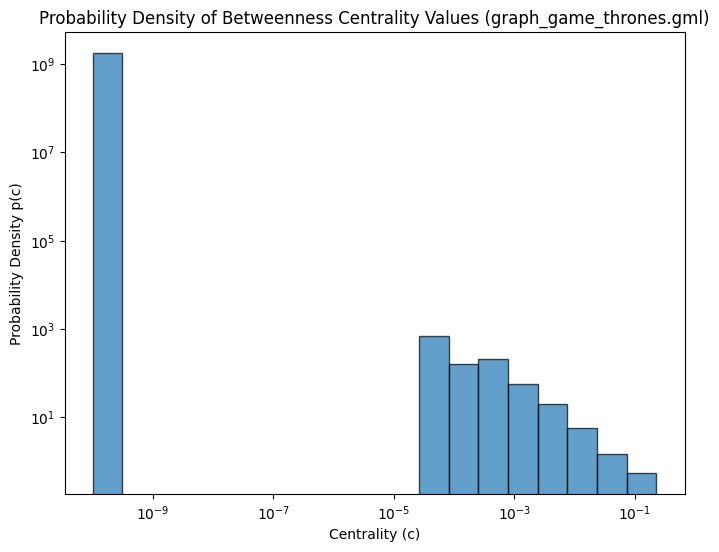

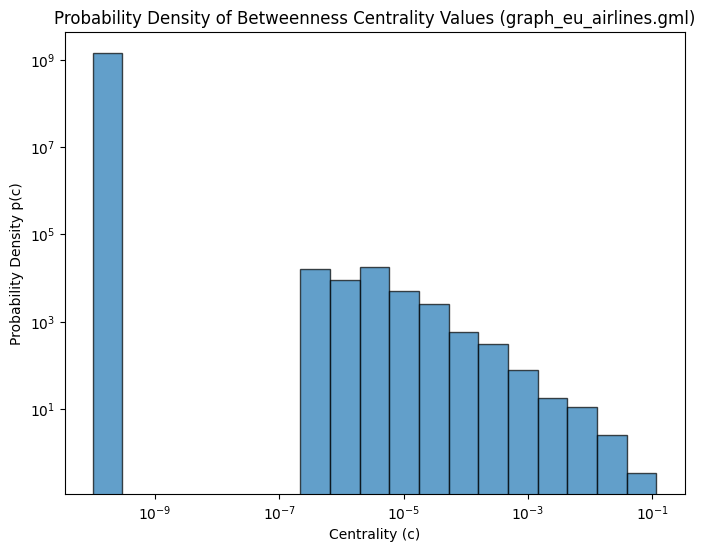

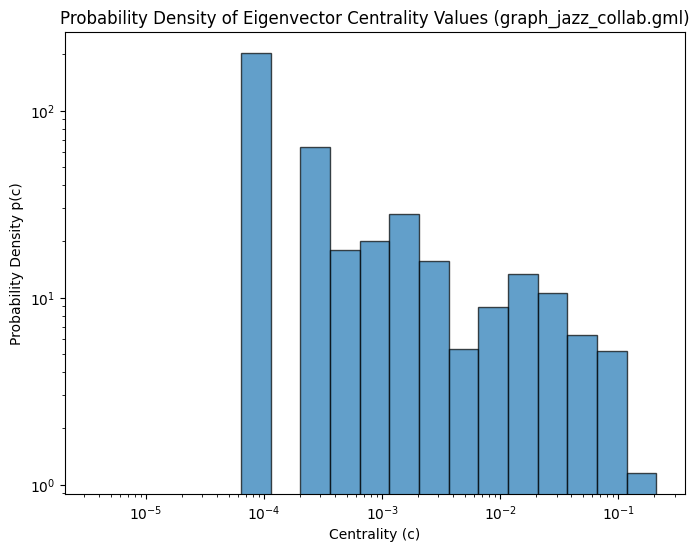

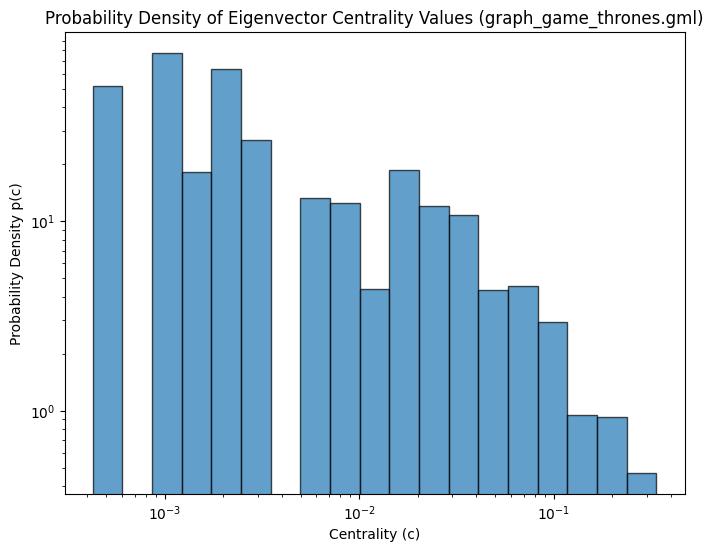

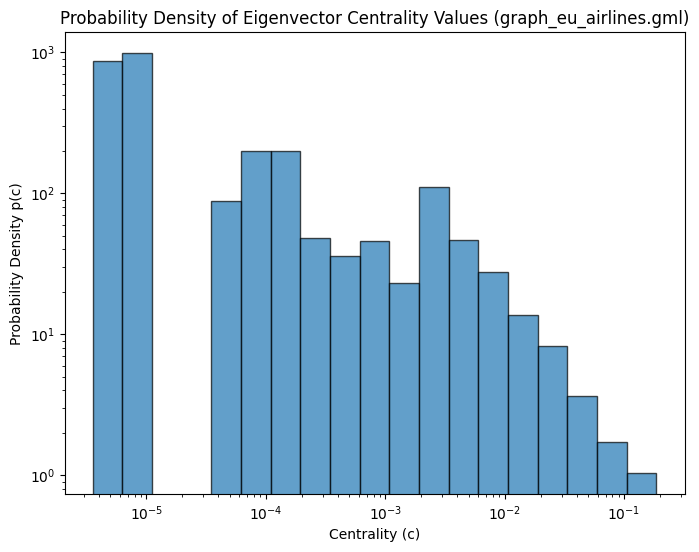

In [5]:
plot_centrality_distribution(graphs, degree_c, "Degree")
plot_centrality_distribution(graphs, closeness_c, "Closeness")
plot_centrality_distribution(graphs, betweenness_c, "Betweenness")
plot_centrality_distribution(graphs, eigenvector_c, "Eigenvector")

2. (2points)
Do a scatter plot of each pair of centralities (6 plots total).
Compute the Pearson, Spearman, and Kendall correlation coefficients for each pair and note them on the scatter plots.
Hint: Centrality measures are available in NetworkX, while correlation coefficients are available in the module scipy.stats.

* For 2 vectors x and y, the Pearson’s r correlation is:
 * r(x,y)= Cov(x,y) / (σx * σy)

* The spearman’s ρ is:
 * ρ(x, y) = r(rank(x), rank(y)),

 * where rank(x) is the sorted version of x.

* Kendall’s τ is:
 * τ(x,y)= (1/ (N 2)) ∑(i>j) (sign(xi −xj)sign(yi −yj)),
 * where sign(z) is 1 if z > 0, −1 if z < 0, and 0 if z = 0.

In [6]:
def plot_c1_against_c2(graphs: list, x_per_g: list, x_type: str, y_per_g: list, y_type: str):
    for i, _ in enumerate(graphs):
        x, y = zip(
            *[(x_per_g[i][n], y_per_g[i][n]) for n in graphs[i].nodes()]
        )
        pearson_corr, _ = sp.stats.pearsonr(x, y)
        spearman_corr, _ = sp.stats.spearmanr(x, y)
        kendall_corr, _ = sp.stats.kendalltau(x, y)

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y)
        plt.xlabel(f"{x_type} Centrality")
        plt.ylabel(f"{y_type} Centrality")
        plt.title(f"Scatter plot of {x_type} vs {y_type} {gml_files[i]}")
        plt.text(0.05, 0.95, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}\nKendall: {kendall_corr:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
        plt.plot([0,1], [0,1], "k--")
        plt.show()

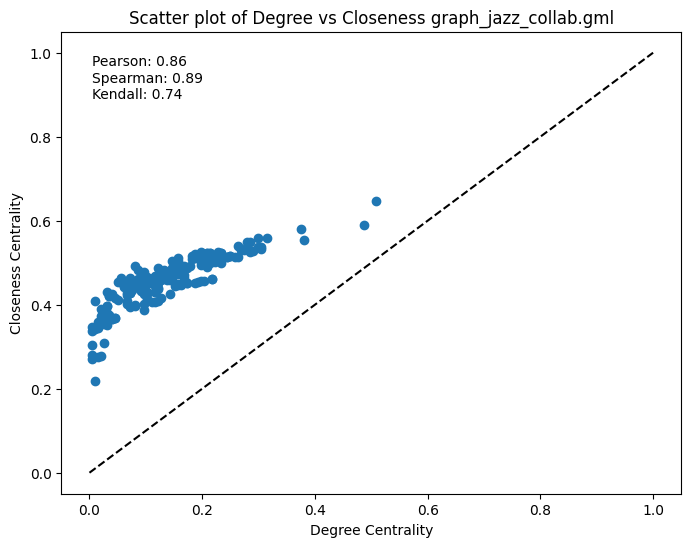

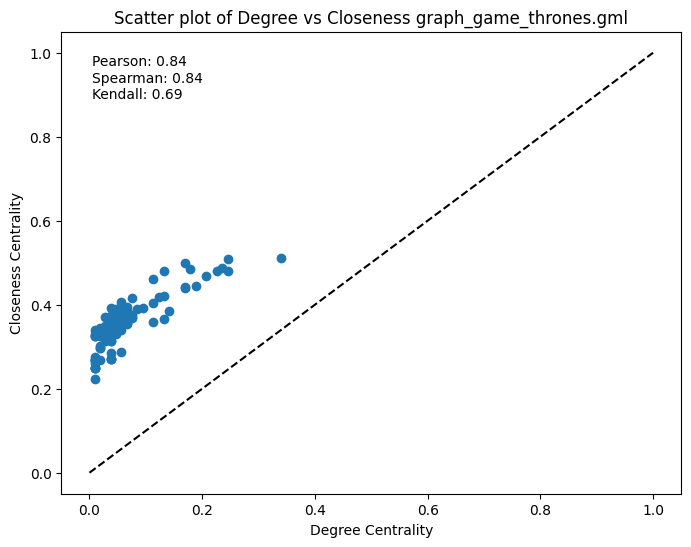

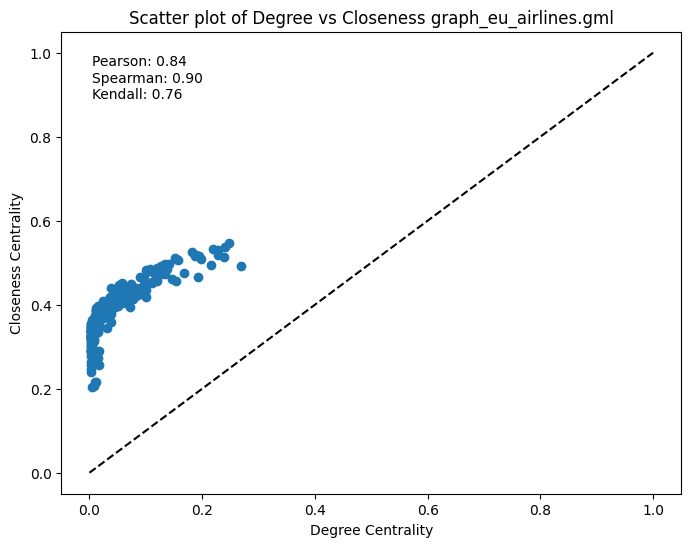

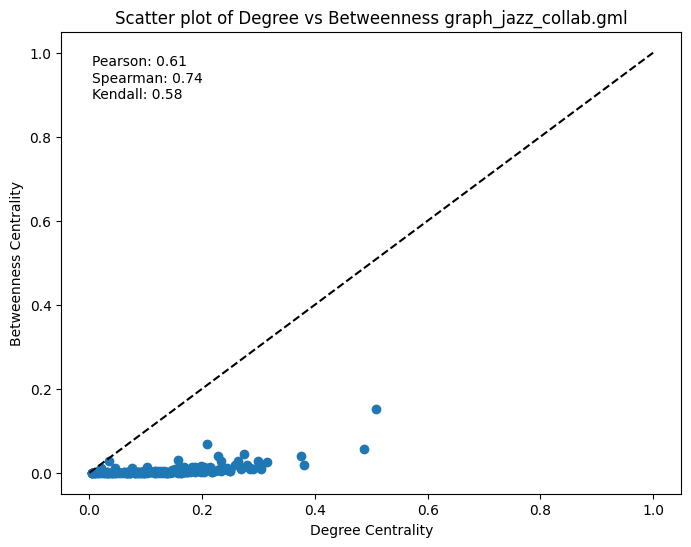

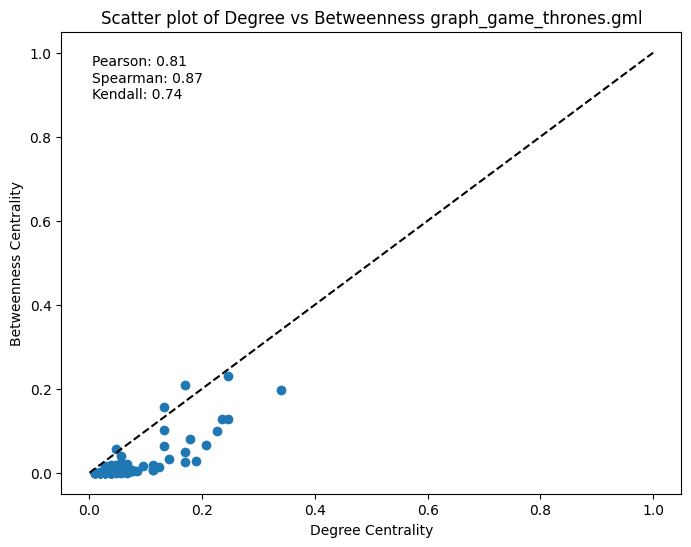

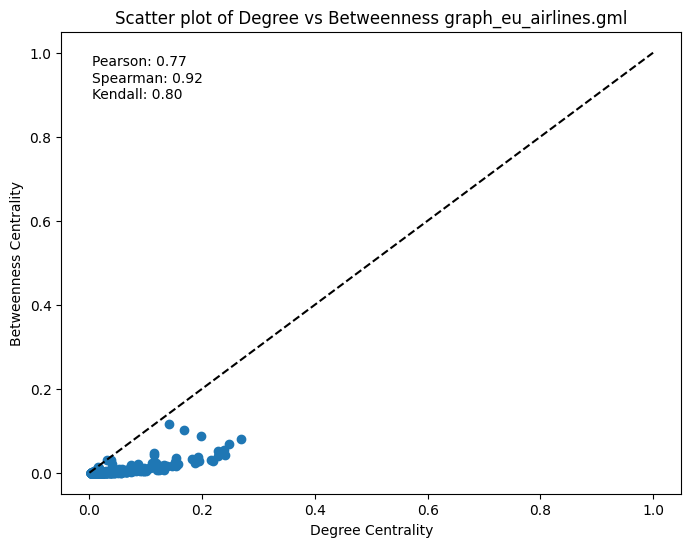

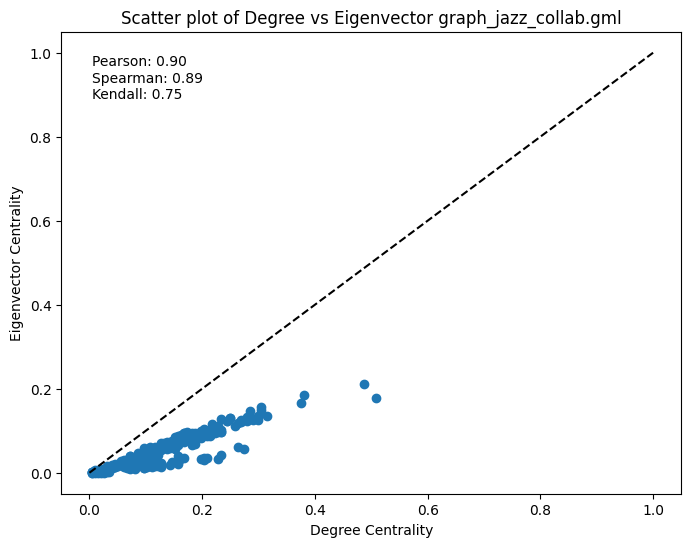

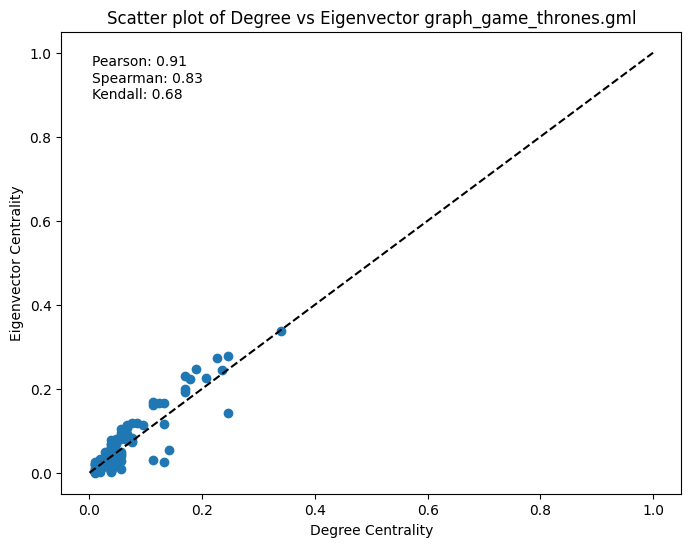

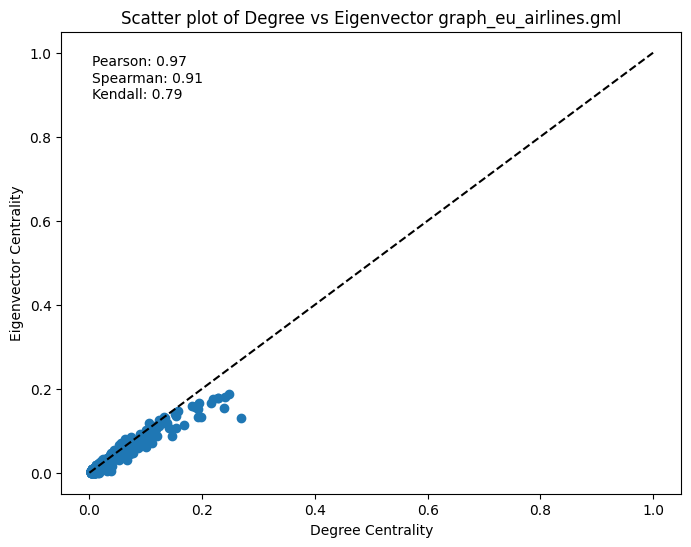

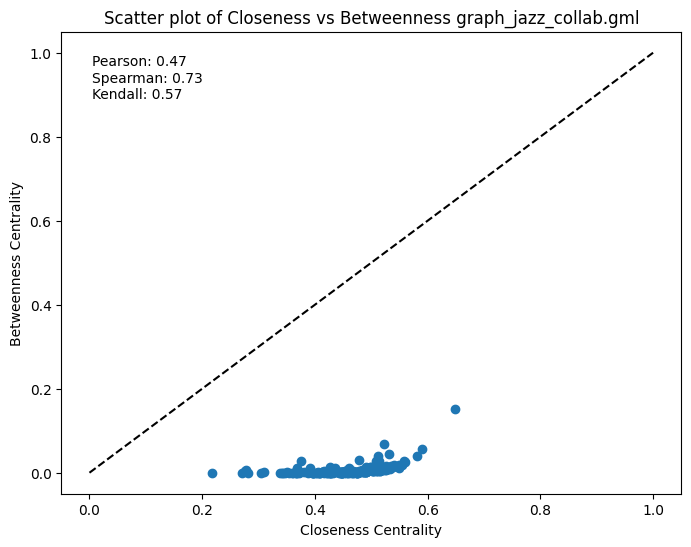

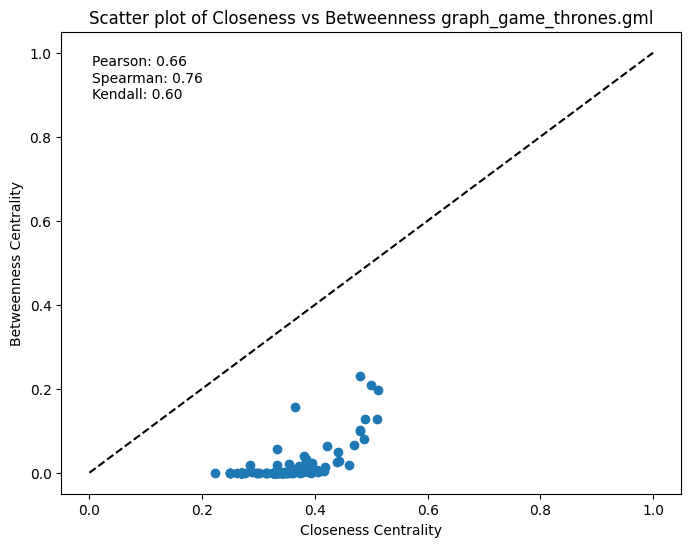

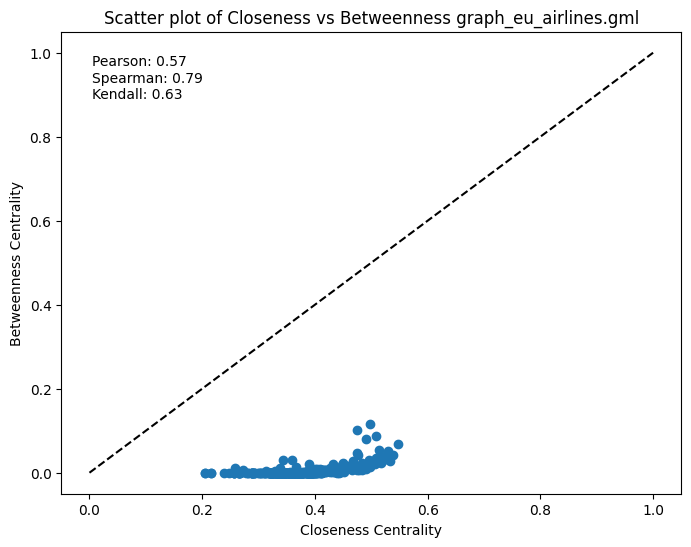

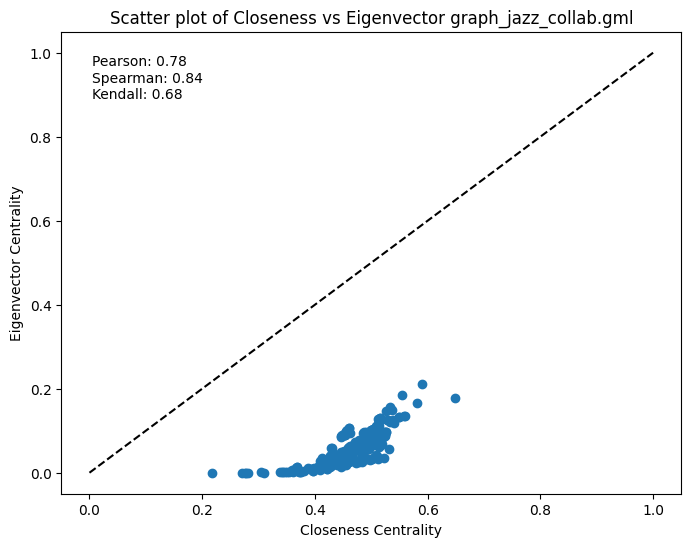

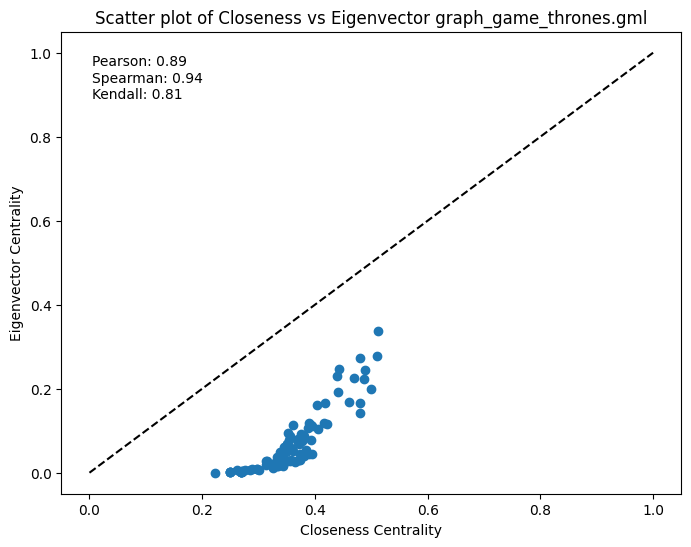

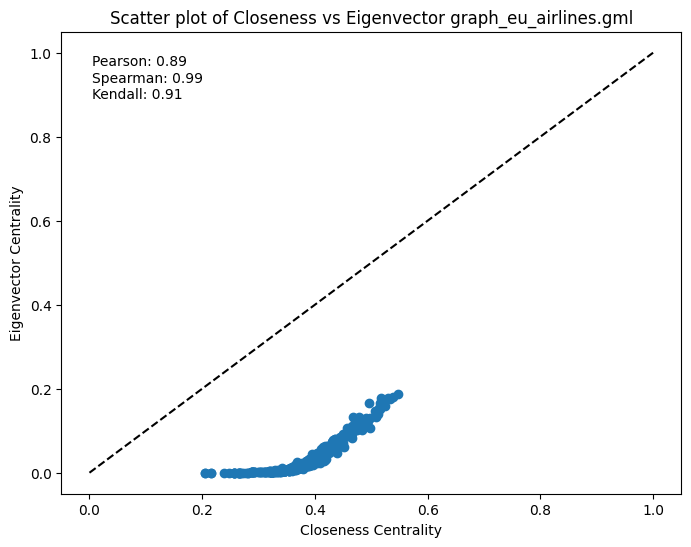

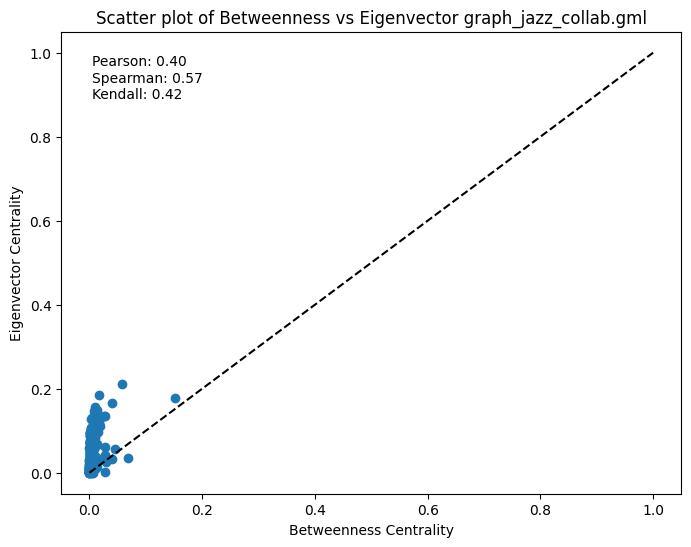

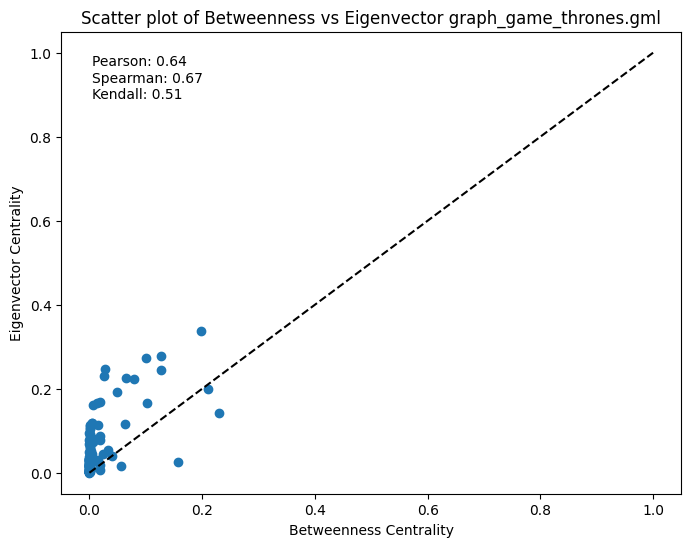

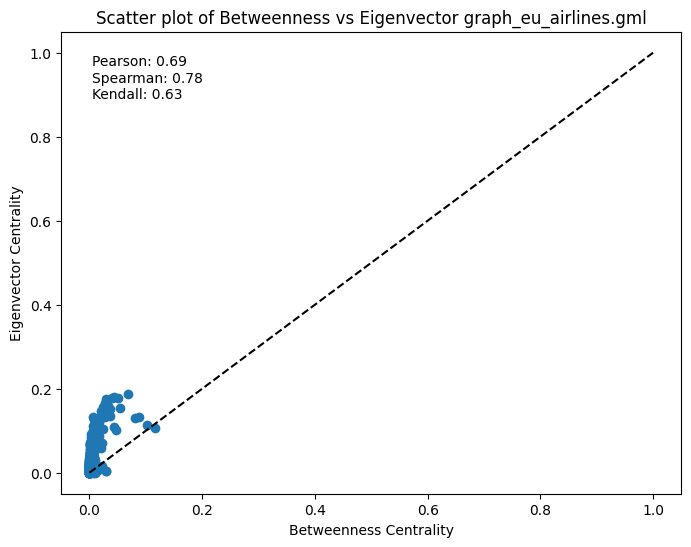

In [7]:
plot_c1_against_c2(graphs, degree_c, "Degree", closeness_c, "Closeness")
plot_c1_against_c2(graphs, degree_c, "Degree", betweenness_c, "Betweenness")
plot_c1_against_c2(graphs, degree_c, "Degree", eigenvector_c, "Eigenvector")
plot_c1_against_c2(graphs, closeness_c, "Closeness", betweenness_c, "Betweenness")
plot_c1_against_c2(graphs, closeness_c, "Closeness", eigenvector_c, "Eigenvector")
plot_c1_against_c2(graphs, betweenness_c, "Betweenness", eigenvector_c, "Eigenvector")


3. (2points)
Randomize the given networks and calculate the same centralities as in point 1.
Create a scatter plot of the original centralities and the randomized ones.
Compute the Pearson correlation coefficient for each pair and note them on the scatter plot.
Briefly comment on what you have observed.
Hint: To generate randomized graphs, you can use NetworkX, as you did in assignment 2.

In [8]:
graphs_random = [nx.algorithms.smallworld.random_reference(g, connectivity=False, seed=42) for g in graphs]

degree_c_rand = [nx.degree_centrality(g) for g in graphs_random]
closeness_c_rand = [nx.closeness_centrality(g) for g in graphs_random]
betweenness_c_rand = [nx.betweenness_centrality(g) for g in graphs_random]
eigenvector_c_rand = [nx.eigenvector_centrality(g) for g in graphs_random]

In [9]:
def plot_c1_against_c1_with_random(
    graphs: list,
    y_per_g: list,
    x_per_g_rand: list,
    type: str,
):
    for i, _ in enumerate(graphs):
        x, y = zip(*[(x_per_g_rand[i][n], y_per_g[i][n]) for n in graphs[i].nodes()])
        pearson_corr, _ = sp.stats.pearsonr(x, y)


        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, label="Original Graph", alpha=0.7)
        plt.xlabel(f"{type} Centrality Random")
        plt.ylabel(f"{type} Centrality")
        plt.title(f"Scatter plot of {type} vs {type} Random {gml_files[i]}")
        plt.text(
            0.05,
            0.95,
            f"Pearson r: {pearson_corr:.2f}",
            transform=plt.gca().transAxes,
            fontsize=10,
            verticalalignment="top",
        )
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.plot([0,1], [0,1], "k--")
        plt.show()

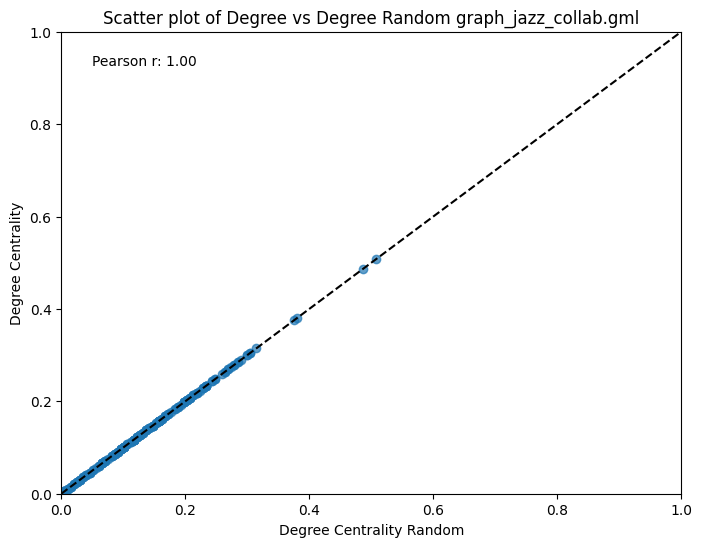

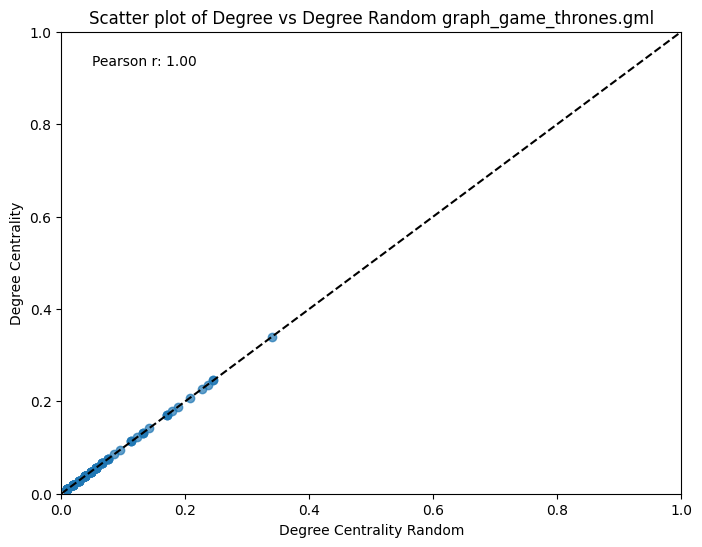

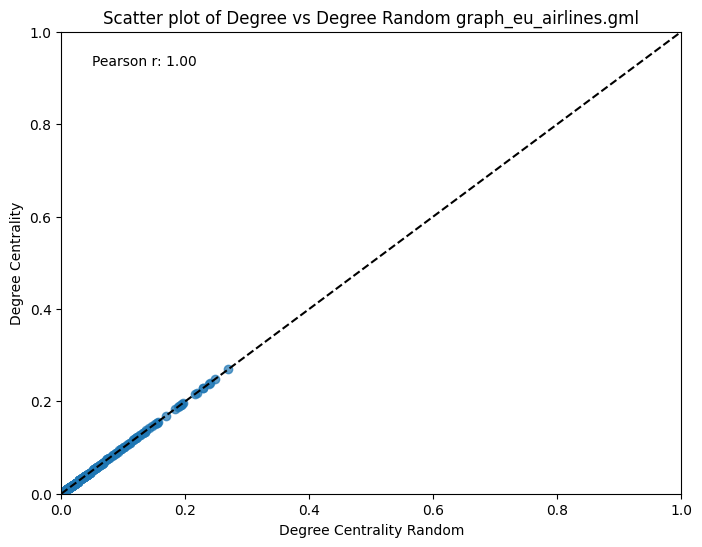

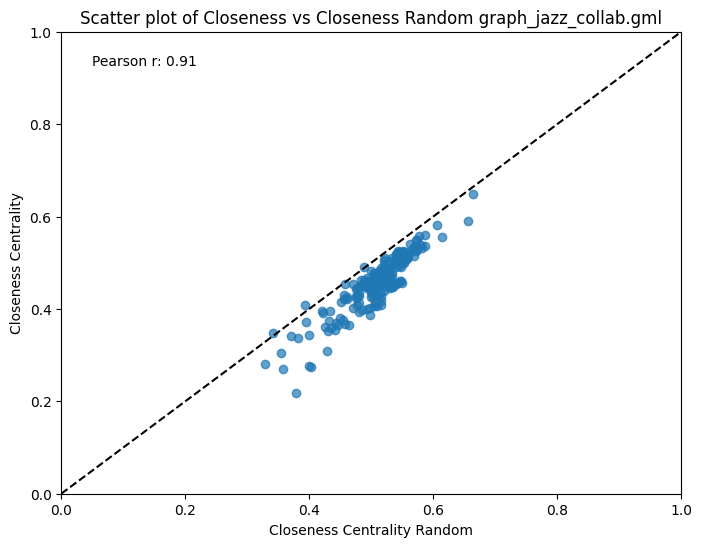

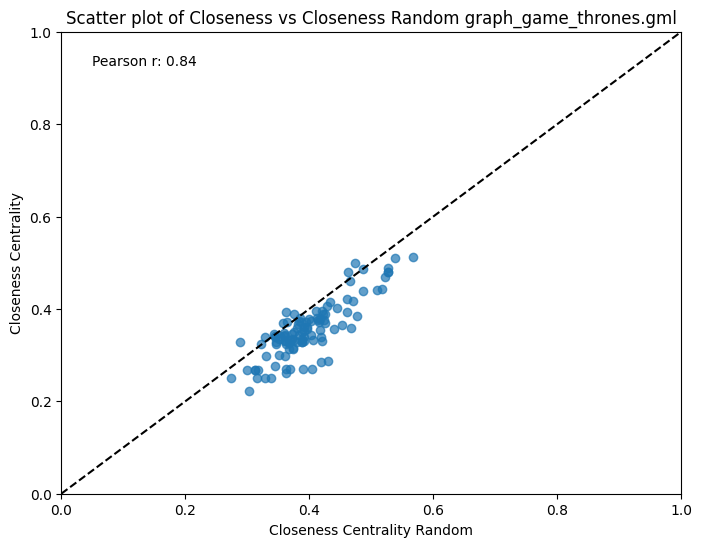

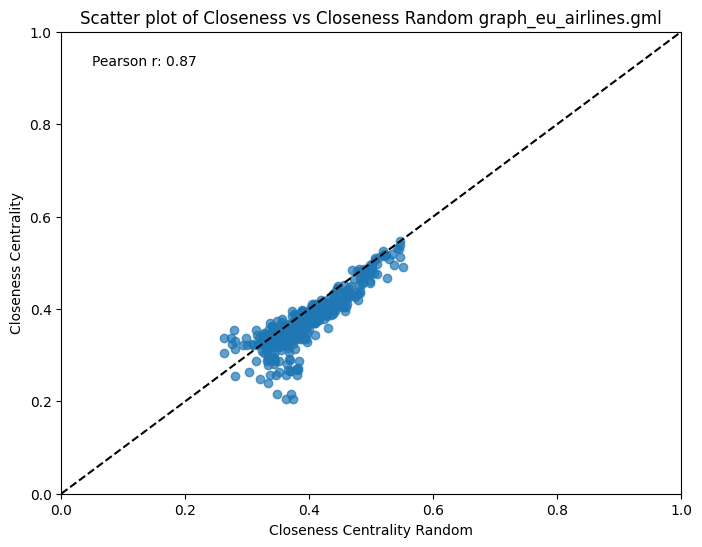

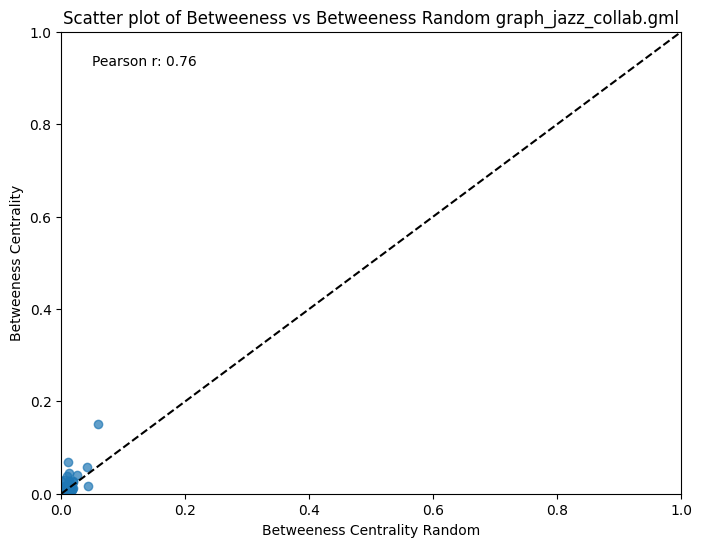

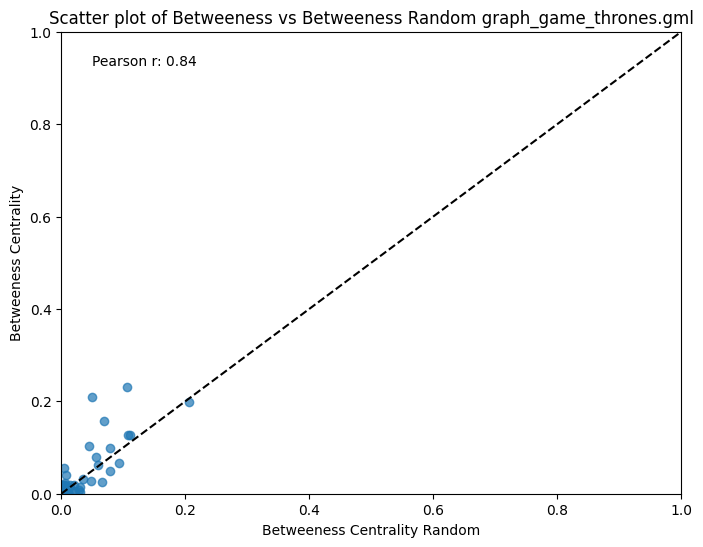

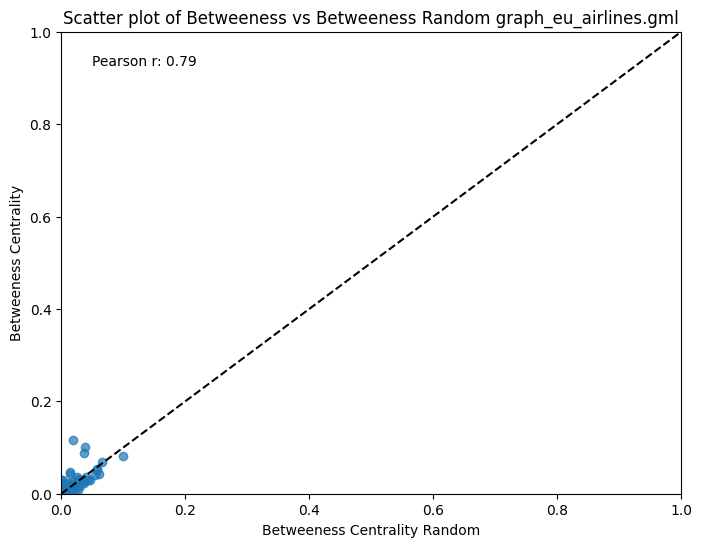

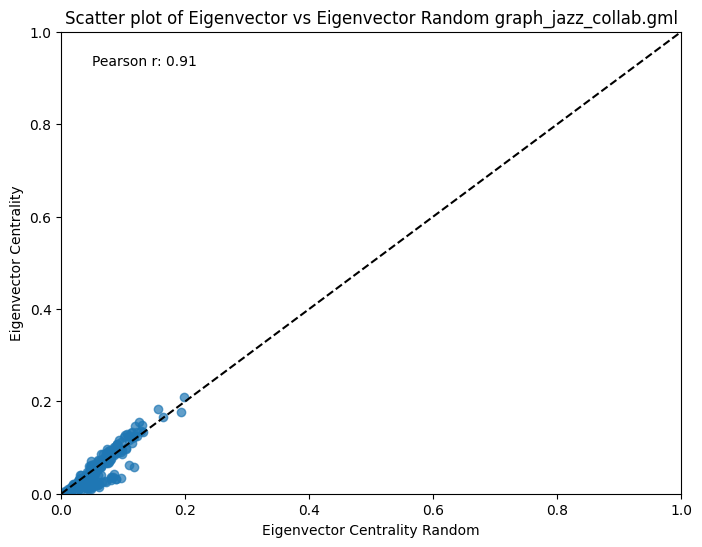

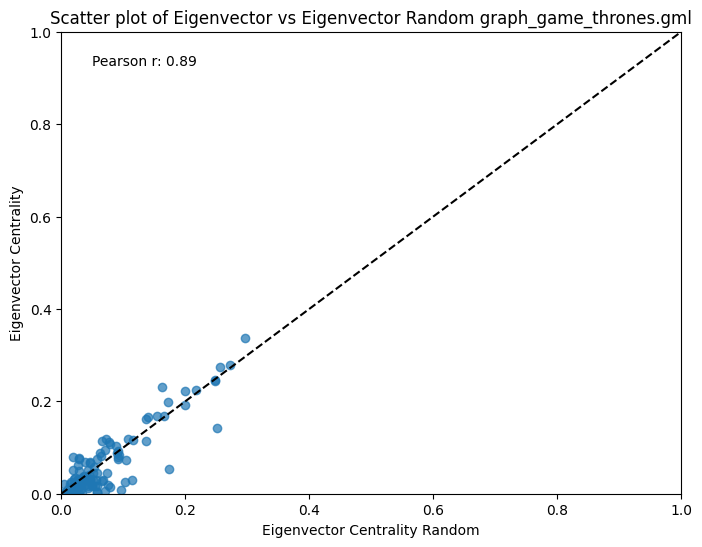

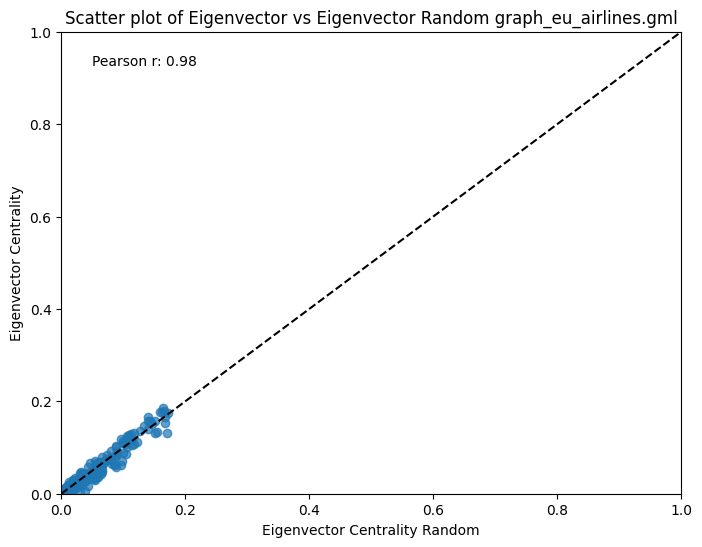

In [10]:
plot_c1_against_c1_with_random(graphs, degree_c, degree_c_rand, "Degree")
plot_c1_against_c1_with_random(graphs, closeness_c, closeness_c_rand, "Closeness")
plot_c1_against_c1_with_random(graphs, betweenness_c, betweenness_c_rand, "Betweeness")
plot_c1_against_c1_with_random(graphs, eigenvector_c, eigenvector_c_rand, "Eigenvector")


Across all the networks, the degree centrality consistently shows a perfect correlation with the randomized versions, reflecting that the number of connections for each node is preserved during randomization.

However, for closeness, betweenness, and eigenvector centralities, we observe varying levels of deviation from the randomized networks, suggesting that the original networks possess non-random structural features:

- Closeness Centrality: The correlations are generally high but not perfect, indicating that while the networks maintain some efficiency in reachability, the original structures exhibit more optimized central positions for certain nodes.
- Betweenness Centrality: This measure shows the lowest correlations across all networks, highlighting that the original networks have specific nodes that play significant bridging roles, which are less evident after randomization.
- Eigenvector Centrality: High correlations suggest that influential nodes remain prominent in randomized networks, but the original structures emphasize important connections more distinctly.

So we can see that these patterns indicate that the original networks contain intentional structuring with key hubs, strategic connectors, and central figures, which are disrupted when the networks are randomized.

# 4.
(1 point) Provide an interpretation of each centrality, rooting it in the results you computed in the previous points and the real-world relationships the networks are describing.
Explain the interpretation of each centrality and the observed differences and similarities reported in the previous points.


## Jazz Collaboration Network

### Degree Centrality
- Represents the number of collaborations a musician has. The roughly uniform distribution suggests many musicians have different numbers of connections, highlighting a mix of highly connected “hub” musicians and less connected individuals.
- Correlates strongly with closeness (Pearson 0.86) and eigenvector centrality (Pearson 0.90), indicating that musicians with more collaborations tend to be well-positioned for quick connections and are also linked to influential collaborators.

### Closeness Centrality:
- Measures how quickly a musician can connect to all others. The distribution shows that some musicians are more central than others, likely reflecting key figures who frequently perform with various artists.
- Its moderate correlation with betweenness (Pearson 0.47) suggests that while some central musicians also act as bridges, these roles don’t always overlap.

### Betweenness Centrality:
- Indicates musicians who bridge different clusters. The distribution shows most musicians have low betweenness, with a few high values, reflecting key connectors who facilitate collaborations across sub-groups.
- Low correlation with other centralities implies that having many collaborations or being central in the network doesn’t always equate to acting as a bridge.

### Eigenvector Centrality:
- Reflects connections to influential musicians. The distribution indicates a few highly influential musicians who are well-connected to other key players.
- Strong correlation with degree suggests that well-connected musicians tend to be influential, enhancing their importance within the network.

## Airlines Network

### Degree Centrality
- Measures the number of routes an airline operates. The distribution shows a heavy-tail, indicating that most airlines have few connections, while a few major hubs have many.
- Strong correlations with closeness (Pearson 0.84) and eigenvector centrality (Pearson 0.97) suggest that airlines with more routes are also better positioned for quick connectivity and are linked to other well-connected airlines.

### Closeness Centrality:
- Reflects how quickly an airline can connect to all others. The roughly normal distribution suggests most airlines have similar reachability, with a few having exceptionally good or poor connectivity.
- Moderate correlation with betweenness (Pearson 0.57) implies that not all centrally reachable airlines serve as key connectors in the network.

### Betweenness Centrality:
- Indicates airlines that act as bridges between different regions. The highly skewed distribution shows that most airlines have very low (0) betweenness, with a few playing crucial roles in connecting otherwise disparate parts of the network.
- Lower correlation with degree centrality (Pearson 0.77) highlights that having many routes does not necessarily mean being a critical connector.

### Eigenvector Centrality:
- Captures the influence of airlines based on connections to other influential airlines. The distribution reveals a concentration of airlines with low influence, with a gradual decrease as centrality increases.
- High correlation with degree centrality indicates that airlines with more routes tend to have more influential connections.

## Game of Thrones Co-appearances Network

### Degree Centrality
- Nodes with high degree centrality represent characters who co-appear frequently with others in the series. The distribution shows a range of connectivity, indicating that while some characters are highly connected (e.g., main characters appearing in many scenes), others are less central.
- The distribution suggests a small number of highly connected characters, with many characters having fewer connections. This aligns with the presence of key characters who dominate the narrative.

### Closeness Centrality:
- Characters with high closeness centrality can reach other characters quickly, either directly or through a few intermediaries. The relatively high correlation between degree and closeness indicates that characters who co-appear frequently are also central in terms of reaching others.
- The variability suggests that not all main characters are equally close to others, potentially reflecting different levels of involvement in the storyline.

### Betweenness Centrality:
- The distribution is highly skewed, with most characters having low (0) betweenness centrality, while a few characters act as critical bridges connecting different groups.
- High betweenness centrality indicates characters who play pivotal roles in connecting various subplots or narrative threads. These characters may not appear as often but are key in linking different parts of the story.

### Eigenvector Centrality:
- High eigenvector centrality suggests that certain characters are not only central but are connected to other influential characters. This reinforces the idea that some key characters dominate the narrative, being linked to other central figures.
- The distribution shows a range of centralities, implying that some characters are influential within influential groups, while others have more peripheral roles.